## Load Data

Preparation of data takes place in separate scripts. In the following, the aggregated data frames are read in from parquet files.

For this template script to work, the data frames must have the expected structure:

In [2]:
# Expected data frame structure (empty example data frame)
import pandas as pd
expected_df_structure = pd.DataFrame(columns=[
    'ID', 'PARAMETER', 'RUNTIME', 'MODEL', 'SCALED', 'LIBRARY', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST', 'ALARM_TYPE', 
    'TP', 'FN', 'FP', 'TN', 
    'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S', 
    'N_CHUNKS', 'N_ITERATIONS'])

In [3]:
import pandas as pd
import pyarrow as pa
arimax_overview = pd.read_parquet('../data/arima-data_week15/arima-x_forecast_overview_first15000_2021-07-27T16-55-56_extended.parquet', engine='pyarrow')
# rnn_overview = pd.read_parquet('../data/INSERT.parquet', engine='pyarrow')

In [4]:
# Sort by ID, but sort alarm type low in front of high
arimax_overview['TEMPORARY_SORTING_COLUMN'] = arimax_overview.ID.replace( ['_H', '_L'], ['', ''], regex=True)
arimax_overview = arimax_overview.sort_values(by=['TEMPORARY_SORTING_COLUMN', 'ALARM_TYPE'], ascending = [True, False]).drop(['TEMPORARY_SORTING_COLUMN'], axis = 1).reset_index(drop=True)
display(arimax_overview)

,ID,PARAMETER,RUNTIME,MODEL,SCALED,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,...,TPR,FNR,TNR,ACC,F1S,N_CHUNKS,N_ITERATIONS,TS,MCC,WEIGHTED_SCORE_AA
0,BP_A_01_12_d_L,BP,24692.51368,ARIMA,n/a,darts,Median,n/a,12,Low,...,0.1884,0.8116,0.9898,0.9630,0.2539,2843.0,33479.0,0.145417,0.253880,0.076036
1,BP_A_01_12_d_H,BP,24692.51368,ARIMA,n/a,darts,Median,n/a,12,High,...,0.5368,0.4632,0.9844,0.9608,0.5911,2843.0,33479.0,0.419540,0.573974,0.223926
2,BP_A_01_30_d_L,BP,6971.70248,ARIMA,n/a,darts,Median,n/a,30,Low,...,0.1642,0.8358,0.9928,0.9653,0.2391,546.0,8080.0,0.135802,0.254309,0.080292
3,BP_A_01_30_d_H,BP,6971.70248,ARIMA,n/a,darts,Median,n/a,30,High,...,0.5139,0.4861,0.9905,0.9671,0.6053,546.0,8080.0,0.434043,0.599162,0.267717
4,BP_A_02_12_d_L,BP,47695.38304,ARIMA,n/a,darts,Min,n/a,12,Low,...,0.1899,0.8101,0.9885,0.9592,0.2545,2843.0,33479.0,0.145807,0.251845,0.075600
5,BP_A_02_12_d_H,BP,47695.38304,ARIMA,n/a,darts,Max,n/a,12,High,...,0.5391,0.4609,0.9835,0.9593,0.5911,2843.0,33479.0,0.419574,0.572842,0.222373
6,BP_A_02_30_d_L,BP,13822.71267,ARIMA,n/a,darts,Min,n/a,30,Low,...,0.1898,0.8102,0.9920,0.9627,0.2712,546.0,8080.0,0.156863,0.284290,0.092562
7,BP_A_02_30_d_H,BP,13822.71267,ARIMA,n/a,darts,Max,n/a,30,High,...,0.5317,0.4683,0.9896,0.9663,0.6158,546.0,8080.0,0.444898,0.607035,0.269136
8,BP_A_03_12_d_L,BP,36651.48378,ARIMAX,n/a,darts,Min,Median,12,Low,...,0.1932,0.8068,0.9881,0.9589,0.2564,2843.0,33479.0,0.147022,0.252226,0.075190
9,BP_A_03_12_d_H,BP,36651.48378,ARIMAX,n/a,darts,Max,Median,12,High,...,0.5353,0.4647,0.9835,0.9590,0.5882,2843.0,33479.0,0.416596,0.569924,0.220794


In [8]:
# Results for selected parameter
selected_parameter = 'HR'

results_selected_parameter = arimax_overview[arimax_overview.PARAMETER == selected_parameter][
    ['ID', 'ALARM_TYPE', 'TP', 'FN', 'FP', 'TN', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S','TS','MCC','WEIGHTED_SCORE_AA', 'N_CHUNKS', 'N_ITERATIONS']
    ].reset_index(drop=True)

# Print best FPR & F1S - Multiple lines are displayed if there are identical scores (e.g. darts and pmdarima)
print("Best (highest) TS - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.TS == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].TS.max()][['ID','TS']])
print("----------")
print("Best (highest) TS - High Alarm:")
print(results_selected_parameter[results_selected_parameter.TS == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].TS.max()][['ID','TS']])
print("----------")
print("Best (highest) WEIGHTED_SCORE_AA - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.WEIGHTED_SCORE_AA == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].WEIGHTED_SCORE_AA.max()][['ID','WEIGHTED_SCORE_AA']])
print("----------")
print("Best (highest) WEIGHTED_SCORE_AA - High Alarm:")
print(results_selected_parameter[results_selected_parameter.WEIGHTED_SCORE_AA == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].WEIGHTED_SCORE_AA.max()][['ID','WEIGHTED_SCORE_AA']])
print("----------")
print("Best (highest) MCC - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.MCC == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].MCC.max()][['ID','MCC']])
print("----------")
print("Best (highest) MCC - High Alarm:")
print(results_selected_parameter[results_selected_parameter.MCC == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].MCC.max()][['ID','MCC']])
print("----------")

Best (highest) TS - Low Alarm:
               ID       TS
2  HR_A_01_30_d_L  0.27232
----------
Best (highest) TS - High Alarm:
               ID        TS
3  HR_A_01_30_d_H  0.283111
----------
Best (highest) WEIGHTED_SCORE_AA - Low Alarm:
               ID  WEIGHTED_SCORE_AA
2  HR_A_01_30_d_L           0.112971
----------
Best (highest) WEIGHTED_SCORE_AA - High Alarm:
               ID  WEIGHTED_SCORE_AA
3  HR_A_01_30_d_H           0.146442
----------
Best (highest) MCC - Low Alarm:
               ID       MCC
2  HR_A_01_30_d_L  0.424049
----------
Best (highest) MCC - High Alarm:
               ID       MCC
3  HR_A_01_30_d_H  0.443836
----------


## Model Comparison FPR & F1S

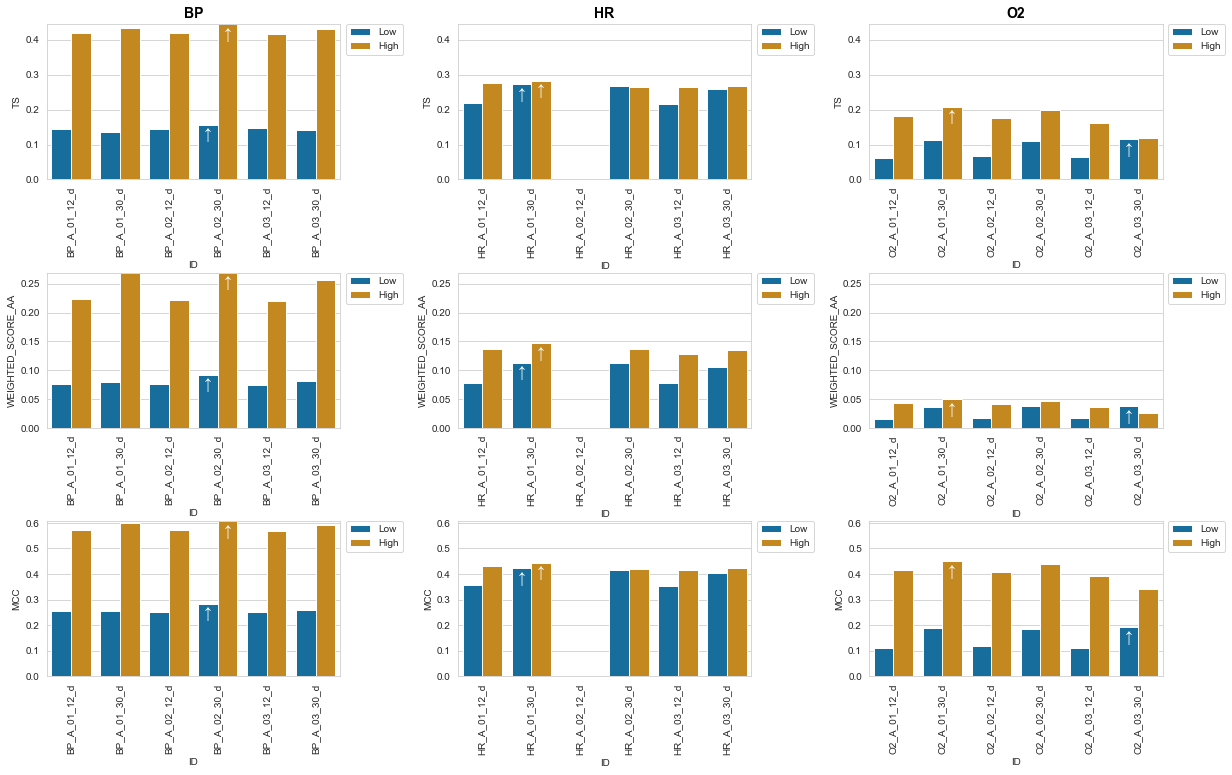

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview
# overview = arimax_overview[arimax_overview.LIBRARY == 'darts']

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize = (20, 12),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0,max(overview.TS)]
weighted_aa_score_ylimits = [0,max(overview.WEIGHTED_SCORE_AA)]
mcc_ylimits = [0,max(overview.MCC)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(ts_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() == best_ts_low or bar.get_height() == best_ts_high :
            plot1.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='WEIGHTED_SCORE_AA',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1,i].set_ylim(weighted_aa_score_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_weighted_aa_score_low = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()
    best_weighted_aa_score_high = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()

    for bar in plot2.patches:
        if bar.get_height() == best_weighted_aa_score_low or bar.get_height() == best_weighted_aa_score_high :
            plot2.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot3 = sns.barplot(
        ax = axs[2,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[2,i].set_ylim(mcc_ylimits)
    axs[2,i].tick_params(axis="x", rotation=90)
    axs[2,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() == best_mcc_low or bar.get_height() == best_mcc_high :
            plot3.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')  

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'evaluation_metrics_arima-x_' + timestamp + '.png'), dpi=72, bbox_inches='tight')
    

    

plt.show(fig)